# Partie 4 : Visualisation (3-4h)

## Etape 4.1 : Graphiques Matplotlib

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Chemins
DATA_DIR = "../data"
OUTPUT_DIR = "../data/output"
PARQUET_DIR = "../data/output/consommations_clean"

In [15]:
# récupération des données précédentes
df_final = pd.read_csv("../data/output/consommations_enrichies.csv" , sep=",")

1. Evolution temporelle de la consommation totale par type d'energie (line plot)

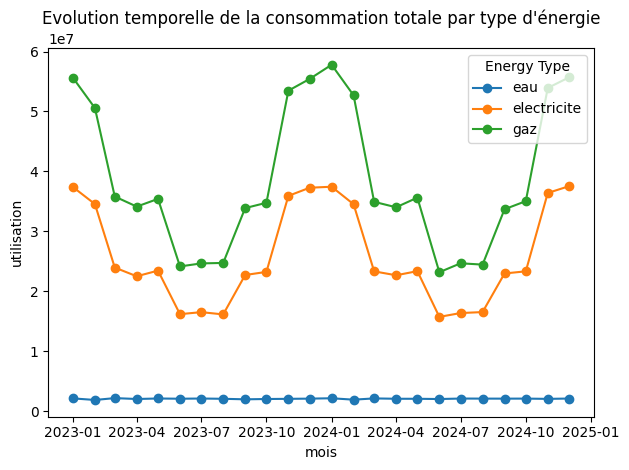

In [16]:
consommation_mensuelle = df_final.groupby(['year','month','type_energie'])['consommation_clean'].sum().reset_index()
consommation_mensuelle['date'] = pd.to_datetime(consommation_mensuelle[['year','month']].assign(DAY=1))

plt.figure()
for energie in consommation_mensuelle['type_energie'].unique():
    subset = consommation_mensuelle[consommation_mensuelle['type_energie']==energie]
    plt.plot(subset['date'], subset['consommation_clean'], marker='o', label=energie)
plt.title("Evolution temporelle de la consommation totale par type d'énergie")
plt.xlabel("mois")
plt.ylabel("utilisation")
plt.legend(title="Energy Type")
plt.tight_layout()
plt.savefig("../data/output/graphics/09_evolution_consommation_par_energie.png", dpi=300, bbox_inches='tight')

2. Distribution des consommations par type de batiment (boxplot)

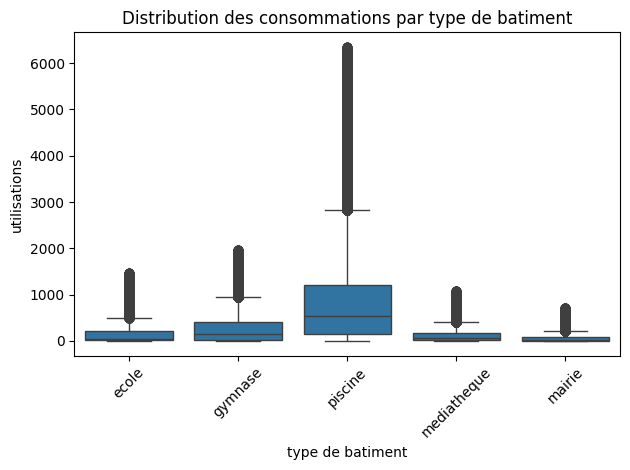

In [17]:
plt.figure()
sns.boxplot(data=df_final, x='type', y='consommation_clean')
plt.title("Distribution des consommations par type de batiment")
plt.xlabel("type de batiment")
plt.ylabel("utilisations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../data/output/graphics/09_distribution_consommation_par_type.png", dpi=300, bbox_inches='tight')

3. Heatmap consommation moyenne par heure et jour de semaine

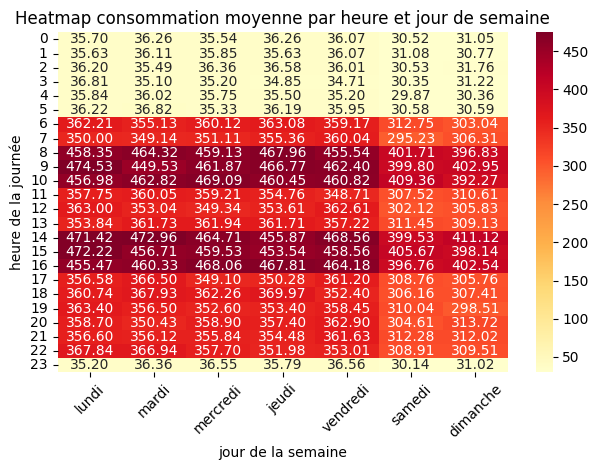

In [18]:
heatmap_data = df_final.groupby(['hour','weekday'])['consommation_clean'].mean().unstack()
heatmap_data.columns = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']
plt.figure()
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Heatmap consommation moyenne par heure et jour de semaine")
plt.xlabel("jour de la semaine")
plt.ylabel("heure de la journée")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../data/output/graphics/07_heatmap_consommation_moyen_par_heure.png", dpi=300, bbox_inches='tight')

4. Scatter plot temperature vs consommation de chauffage avec regression

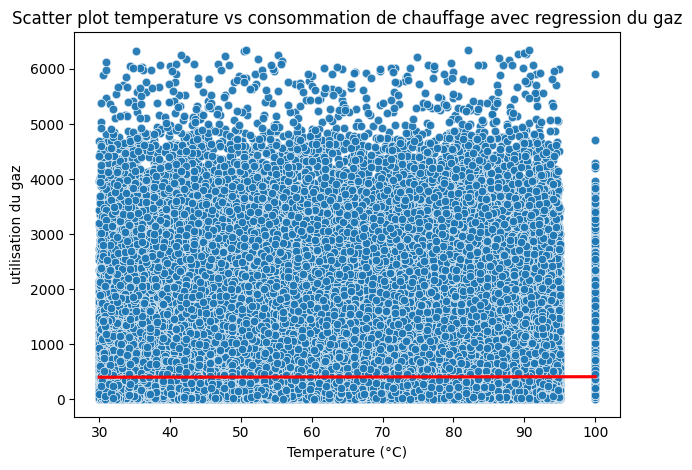

In [19]:
df_chauffage = df_final[df_final['type_energie']=='gaz']
plt.figure()
sns.scatterplot(data=df_chauffage, x='temperature_c', y='consommation_clean', alpha=0.5)
sns.regplot(data=df_chauffage, x='temperature_c', y='consommation_clean', scatter=False, color='red')
plt.title("Scatter plot temperature vs consommation de chauffage avec regression du gaz")
plt.xlabel("Temperature (°C)")
plt.ylabel("utilisation du gaz")
plt.tight_layout()
plt.savefig("../data/output/graphics/09_temperature_vs_consommation_gaz.png", dpi=300, bbox_inches='tight')

5. Comparaison consommation par classe energetique (bar chart)

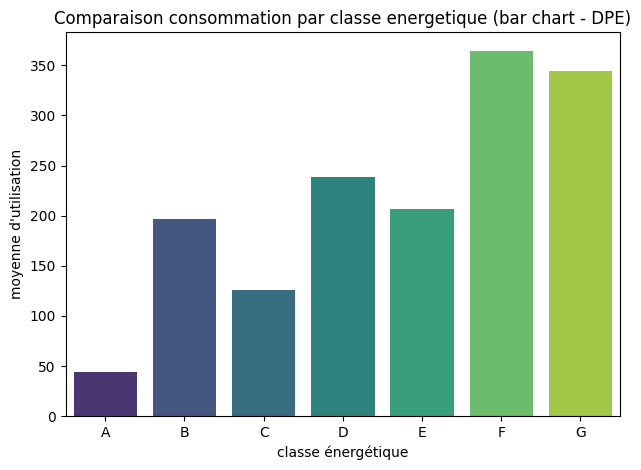

In [20]:
classe_conso = df_final.groupby('classe_energetique')['consommation_clean'].mean().reset_index()
plt.figure()
sns.barplot(data=classe_conso, x='classe_energetique', y='consommation_clean', palette="viridis")
plt.title("Comparaison consommation par classe energetique (bar chart - DPE)")
plt.xlabel("classe énergétique")
plt.ylabel("moyenne d'utilisation")
plt.tight_layout()
plt.savefig("../data/output/graphics/09_comparaison_consommation_par_classe.png", dpi=300, bbox_inches='tight')